<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Переименование столбцов</a></span></li><li><span><a href="#Удаление-пропусков" data-toc-modified-id="Удаление-пропусков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Удаление пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Дополнительные-расчёты" data-toc-modified-id="Дополнительные-расчёты-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Дополнительные расчёты</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Выпущенные-игры" data-toc-modified-id="Выпущенные-игры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выпущенные игры</a></span></li><li><span><a href="#Среднее-время-жизни-платформы" data-toc-modified-id="Среднее-время-жизни-платформы-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Среднее время жизни платформы</a></span></li><li><span><a href="#Актуальный-период" data-toc-modified-id="Актуальный-период-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Актуальный период</a></span></li><li><span><a href="#Потенциально-прибыльные-платформы" data-toc-modified-id="Потенциально-прибыльные-платформы-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Потенциально прибыльные платформы</a></span></li><li><span><a href="#Влияние-отзывов-на-продажи" data-toc-modified-id="Влияние-отзывов-на-продажи-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Влияние отзывов на продажи</a></span></li><li><span><a href="#Игры-по-жанрам" data-toc-modified-id="Игры-по-жанрам-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Игры по жанрам</a></span></li><li><span><a href="#Пользователи-по-регионам" data-toc-modified-id="Пользователи-по-регионам-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Пользователи по регионам</a></span></li></ul></li><li><span><a href="#Статистический-анализ" data-toc-modified-id="Статистический-анализ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Статистический анализ</a></span><ul class="toc-item"><li><span><a href="#Предположение-1" data-toc-modified-id="Предположение-1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Предположение 1</a></span></li><li><span><a href="#Предположение-2" data-toc-modified-id="Предположение-2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Предположение 2</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Признаки привлекательности компьютерных игр
Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/games.csv')

## Изучение данных

In [3]:
# Количество и процент пропусков в столбцах таблицы
def spaces_stat(data):
    spaces_column_names =[]
    spaces_cnt =[]
    spaces_data =[]
    for i in data.columns:
        spaces_column_names.append(i)
    spaces_column_names = pd.DataFrame(spaces_column_names)
    spaces_column_names.columns = ['column_name']
    for j in data.columns:
        spaces_cnt.append(data[j].isna().sum())
    spaces_cnt = pd.DataFrame(spaces_cnt)
    spaces_cnt.columns = ['spaces_cnt']
    spaces_data = pd.concat([spaces_column_names, spaces_cnt], axis=1)
    spaces_data = spaces_data[spaces_data['spaces_cnt']>0].reset_index(drop=True)
    spaces_data['spaces_pct'] =round(spaces_data['spaces_cnt']/len(data)*100,2)
    spaces_data = spaces_data.sort_values('spaces_pct', ascending=False).reset_index(drop=True)
    return spaces_data

In [4]:
# минимальные и максимальные значения числовых столбцов и 
# частота их появления в столбцах — абсолютная и в процентах
def columns_stat(data):
    selected_columns = data.select_dtypes(exclude=['object','bool']).columns
    columns_stat = []
    min_cnt=[]
    max_cnt=[]
    
    for column in selected_columns:
        columns_stat.append(column)
    columns_stat = pd.DataFrame(columns_stat)
    columns_stat.columns = ['column_name']
    columns_stat = columns_stat.reindex(columns = columns_stat.columns.tolist() + ['column_min','min_cnt','column_max','max_cnt'])
    columns_stat['column_min'] = columns_stat['column_min'].fillna((columns_stat['column_name'].map(data.min().to_dict())))
    columns_stat['column_max'] = columns_stat['column_max'].fillna((columns_stat['column_name'].map(data.max().to_dict()))) 
    
    for column in selected_columns:
        min_cnt.append(data[data[column] == data[column].min()][column].count())
        max_cnt.append(data[data[column] == data[column].max()][column].count())
    min_cnt = pd.Series(min_cnt).astype('int')
    min_cnt.index = selected_columns
    min_cnt.to_dict()
    max_cnt = pd.Series(max_cnt).astype('int')
    max_cnt.index = selected_columns
    max_cnt.to_dict()    
    columns_stat['min_cnt'] = columns_stat['min_cnt'].fillna(columns_stat['column_name'].map(min_cnt)).astype('int')
    columns_stat['min_cnt_pct'] = round(columns_stat['min_cnt']/len(data)*100,2)
    columns_stat['max_cnt'] = columns_stat['max_cnt'].fillna(columns_stat['column_name'].map(max_cnt)).astype('int')
    columns_stat['max_cnt_pct'] = round(columns_stat['max_cnt']/len(data)*100,2)
    columns_stat_columns_titles = ['column_name', 'column_min', 'min_cnt', 'min_cnt_pct', 'column_max', 'max_cnt', 'max_cnt_pct']
    columns_stat = columns_stat.reindex(columns=columns_stat_columns_titles)
    return columns_stat

In [5]:
data.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16715 non-null  int64  
 1   Name             16713 non-null  object 
 2   Platform         16715 non-null  object 
 3   Year_of_Release  16446 non-null  float64
 4   Genre            16713 non-null  object 
 5   NA_sales         16715 non-null  float64
 6   EU_sales         16715 non-null  float64
 7   JP_sales         16715 non-null  float64
 8   Other_sales      16715 non-null  float64
 9   Critic_Score     8137 non-null   float64
 10  User_Score       10014 non-null  object 
 11  Rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


In [7]:
%%time
spaces_data = spaces_stat(data)
spaces_data.style.background_gradient('coolwarm')

CPU times: total: 62.5 ms
Wall time: 63.5 ms


,column_name,spaces_cnt,spaces_pct
0,Critic_Score,8578,51.320000
1,Rating,6766,40.480000
2,User_Score,6701,40.090000
3,Year_of_Release,269,1.610000
4,Name,2,0.010000
5,Genre,2,0.010000


In [8]:
data[data['Name'].isna()==True]

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
%%time
columns_data = columns_stat(data)
columns_data

CPU times: total: 31.2 ms
Wall time: 29.2 ms


,column_name,column_min,min_cnt,min_cnt_pct,column_max,max_cnt,max_cnt_pct
0,Unnamed: 0,0.0,1,0.01,16714.00,1,0.01
1,Year_of_Release,1980.0,9,0.05,2016.00,502,3.00
2,NA_sales,0.0,4508,26.97,41.36,1,0.01
3,EU_sales,0.0,5870,35.12,28.96,1,0.01
4,JP_sales,0.0,10514,62.90,10.22,1,0.01
5,Other_sales,0.0,6601,39.49,10.57,1,0.01
6,Critic_Score,13.0,1,0.01,98.00,4,0.02


In [10]:
for column in data.select_dtypes(include=['object']):
    print(data[column].value_counts().iloc[[0, -1]])
    print('_______________________________________________')

Need for Speed: Most Wanted    12
Haitaka no Psychedelica         1
Name: Name, dtype: int64
_______________________________________________
PS2     2161
PCFX       1
Name: Platform, dtype: int64
_______________________________________________
Action    3369
Puzzle     580
Name: Genre, dtype: int64
_______________________________________________
tbd    2424
9.7       1
Name: User_Score, dtype: int64
_______________________________________________
E     3990
AO       1
Name: Rating, dtype: int64
_______________________________________________


In [11]:
data.duplicated().sum()

0

**Вывод**

В рамках предобработки данных следует:
1. Названия столбцов привести к нижнему регистру — для удобства.
2. Поле **Year_of_Release** привести к типу **datetime**, т.к. это год выпуска игры.
    + пустые значения удалить, т.к. они составляют незначительную часть от всего набора данных (менее 2%).
    
    
3. Поле **User_Score** привести к типу **float**, т.к. пользовательская оценка по смыслу должна быть числом и, судям по значениям, может быть нецелой:
    + пустые значения заменить на -1, т.к. других отрицательных значений в поле нет
    + значения "tbd" заменить на -1, т.к. данная аббревиатура означает, что оценка не определена.


4. Строки с неуказанными игрой (**Name**) и жанром (**Genre**) удалить, т.к. данные строки неинформативны и составляют незначительную часть от всего набора данных (менее 1%).
5. В поле **Critic_Score** пустые значения заменить на -1, т.к. других отрицательных значений в поле нет.
6. В поле **Rating** пустые значения заменить на **undefined**.

## Предобработка данных

### Переименование столбцов

In [12]:
data.columns = data.columns.str.lower()
data.columns    

Index(['unnamed: 0', 'name', 'platform', 'year_of_release', 'genre',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score',
       'user_score', 'rating'],
      dtype='object')

### Удаление пропусков

In [13]:
data.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

In [14]:
data['user_score'] = data['user_score'].fillna(-1)
data.loc[data['user_score'] =='tbd', 'user_score'] = -1

In [15]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [16]:
data['rating'] = data['rating'].fillna('undefined')

### Изменение типов данных

In [17]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], yearfirst = True,  format ='%Y')
print('year_of_release','—', data['year_of_release'].dtype)

year_of_release — datetime64[ns]


In [18]:
data['year_of_release'] = data['year_of_release'].dt.year

In [19]:
data['user_score'] = data['user_score'].astype('float')
print('user_score','—', data['user_score'].dtype)

user_score — float64


### Дополнительные расчёты
Суммарные продажи во всех регионах

In [20]:
data['ttl_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Исследовательский анализ

### Выпущенные игры 
* по годам

In [21]:
years = data.groupby('year_of_release')['name'].count().reset_index()
years = years.rename(columns={'name':'games_released_cnt'})
years['games_released_pct'] = round(years['games_released_cnt']/years['games_released_cnt'].sum()*100,2)
years.sort_values(by='games_released_cnt', ascending = False).reset_index(drop=True).head(15)

,year_of_release,games_released_cnt,games_released_pct
0,2008,1427,8.68
1,2009,1426,8.67
2,2010,1255,7.63
3,2007,1197,7.28
4,2011,1136,6.91
5,2006,1006,6.12
6,2005,939,5.71
7,2002,829,5.04
8,2003,775,4.71
9,2004,762,4.63


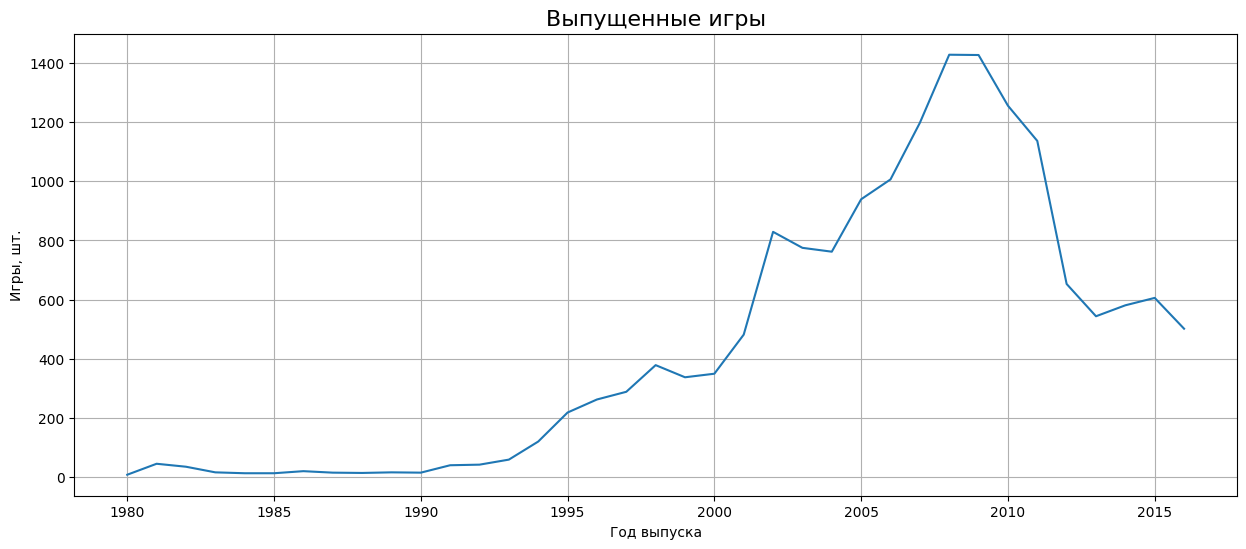

In [22]:
fig1 = years.plot('year_of_release','games_released_cnt', kind = 'line', grid = True, figsize =(15, 6)
                  , legend = False)
fig1.set_title('Выпущенные игры', fontsize=16)
fig1.set_ylabel('Игры, шт.')
fig1.set_xlabel('Год выпуска');

In [23]:
platform_year_max = data.groupby('platform')['year_of_release'].max()
platforms_not_actual = platform_year_max[platform_year_max <2002].reset_index()
platforms_not_actual = platforms_not_actual['platform'].array

In [24]:
data = data[~data['platform'].isin(platforms_not_actual)].reset_index(drop=True)
data['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'N64',
       'PS', 'XB', 'PC', 'PSP', 'XOne', 'WiiU', 'GC', 'DC', 'PSV'],
      dtype=object)

In [25]:
len(data['platform'].unique())

18

**Вывод**
* Больше всего игр вышло в период с 2002 по 2016. 
* Пик индустрии пришёлся на конец нулевых: 2008-2010. 
* Имеет смысл исключить из рассмотрения платформы, последние игры для которых вышли до 2002.
* Итого остаются 18 предположительно актуальных на 2017 платформ, среди которых вечный десктоп (**PC**).

### Среднее время жизни платформы
* продажи на самых доходных платформах по годам
* характерный срок, за который появляются новые и исчезают старые платформы

In [26]:
sales_years = data.groupby(['platform','year_of_release'])['ttl_sales'].sum().reset_index()

In [27]:
sales_years

,platform,year_of_release,ttl_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
163,XB,2008,0.18
164,XOne,2013,18.96
165,XOne,2014,54.07
166,XOne,2015,60.14


In [28]:
sales = sales_years.groupby('platform')['ttl_sales'].sum().reset_index()
sales_top = sales.sort_values(by = 'ttl_sales', ascending = False).reset_index(drop=True).head(9)

In [29]:
platforms_top =[]
for i in range(len(sales_top)):
    platforms_top.append(sales_top['platform'][i])

In [30]:
sales_years_top = sales_years[sales_years['platform'].isin(platforms_top)].reset_index(drop=True)

In [31]:
sales_years_top.groupby('platform')['year_of_release'].count().mean().round(2)

10.11

In [32]:
sales_years_top_pivot = sales_years_top.pivot_table(index = 'year_of_release'
                                                    , columns = 'platform', values = 'ttl_sales').fillna(0)
sales_years_top_pivot['year_of_release'] = sales_years_top_pivot.index
sales_years_top_pivot = sales_years_top_pivot.reset_index(drop=True)

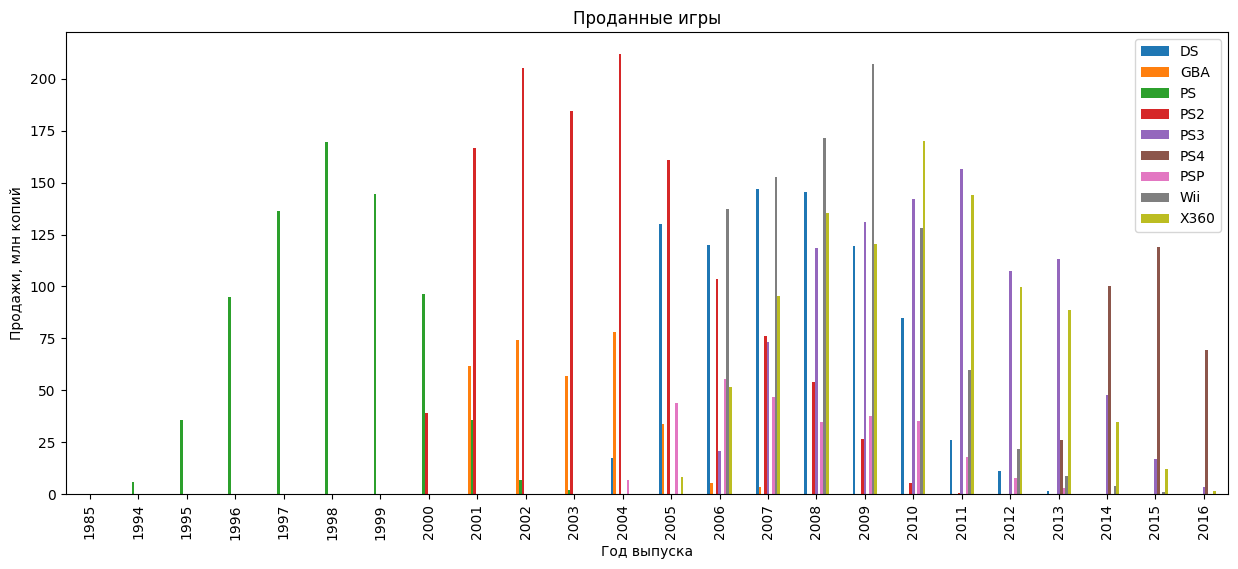

In [33]:
fig2 = sales_years_top_pivot.plot(x='year_of_release', kind='bar', figsize =(15, 6)
                                  , title = 'Проданные игры')
fig2.set_xlabel('Год выпуска')
fig2.set_ylabel('Продажи, млн копий')
fig2.legend(sales_years_top_pivot.columns);

**Вывод**
1. В среднем платформа живёт около 10 лет, далее игры под неё перестают выпускать.
2. Пик популярности платформы приходится примерно на середину её жизненного цикла.
3. Соответственно, в рамках прогноза на 2017 интересны платформы и игры не старше 2011 и бессмертный **PC**.

### Актуальный период 
* для построения прогноза на 2017 год

In [34]:
platforms_not_actual_2 = sales_years[(sales_years['year_of_release']<2011)
                                     &(sales_years['platform']!='PC')]['platform'].unique()
data_actual = data[~data['platform'].isin(platforms_not_actual_2)].reset_index(drop=True)

In [35]:
data_actual = data_actual[data_actual['year_of_release']>=2011]

### Потенциально прибыльные платформы
* ящик с усами в разбивке по продажам

In [36]:
data_actual_sales_years = data_actual.groupby(['platform','year_of_release'])['ttl_sales'].sum().reset_index()
data_actual_sales = data_actual_sales_years.groupby(['platform'])['ttl_sales'].sum().reset_index()
data_actual_sales = data_actual_sales.sort_values(by='ttl_sales',ascending=False).reset_index(drop=True)
data_actual_sales

,platform,ttl_sales
0,PS4,314.14
1,3DS,257.81
2,XOne,159.32
3,PC,97.68
4,WiiU,82.19
5,PSV,53.81


In [37]:
data_actual_sales_pivot = data_actual_sales_years.pivot_table(index = 'year_of_release', columns = 'platform', values = 'ttl_sales').fillna(0)
data_actual_sales_pivot['year_of_release'] = data_actual_sales_pivot.index
data_actual_sales_pivot = data_actual_sales_pivot.reset_index(drop=True)

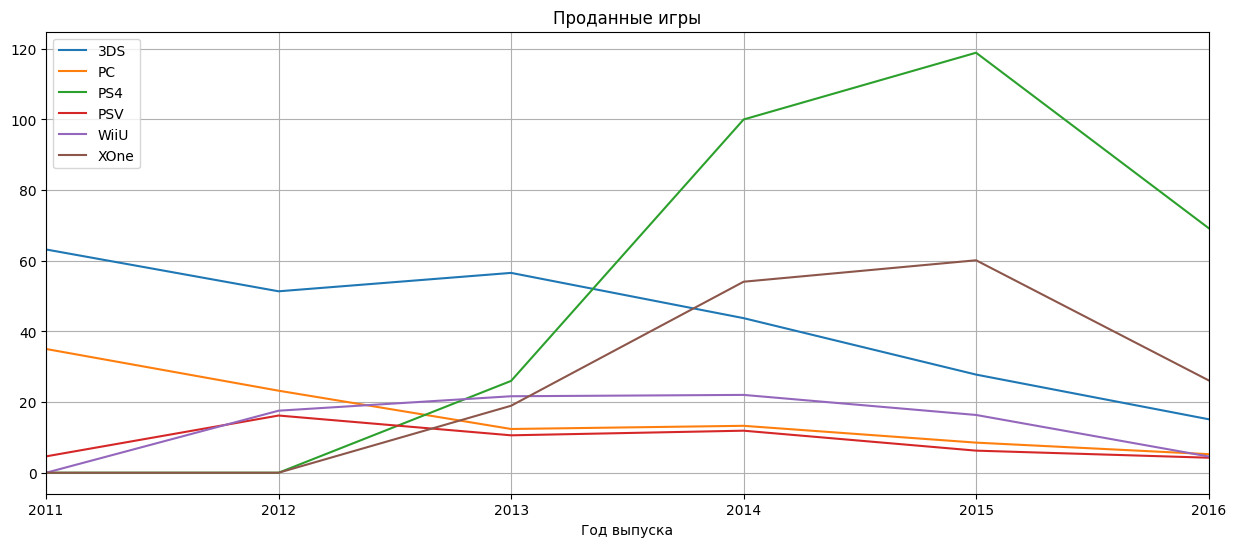

In [38]:
fig3 = data_actual_sales_pivot.plot(x='year_of_release', kind='line', figsize =(15, 6)
                                  , grid = True
                                  , title = 'Проданные игры'
                                  , xlim = (2011,2016))
fig3.set_xlabel('Год выпуска')
fig3.legend(data_actual_sales_pivot.columns);

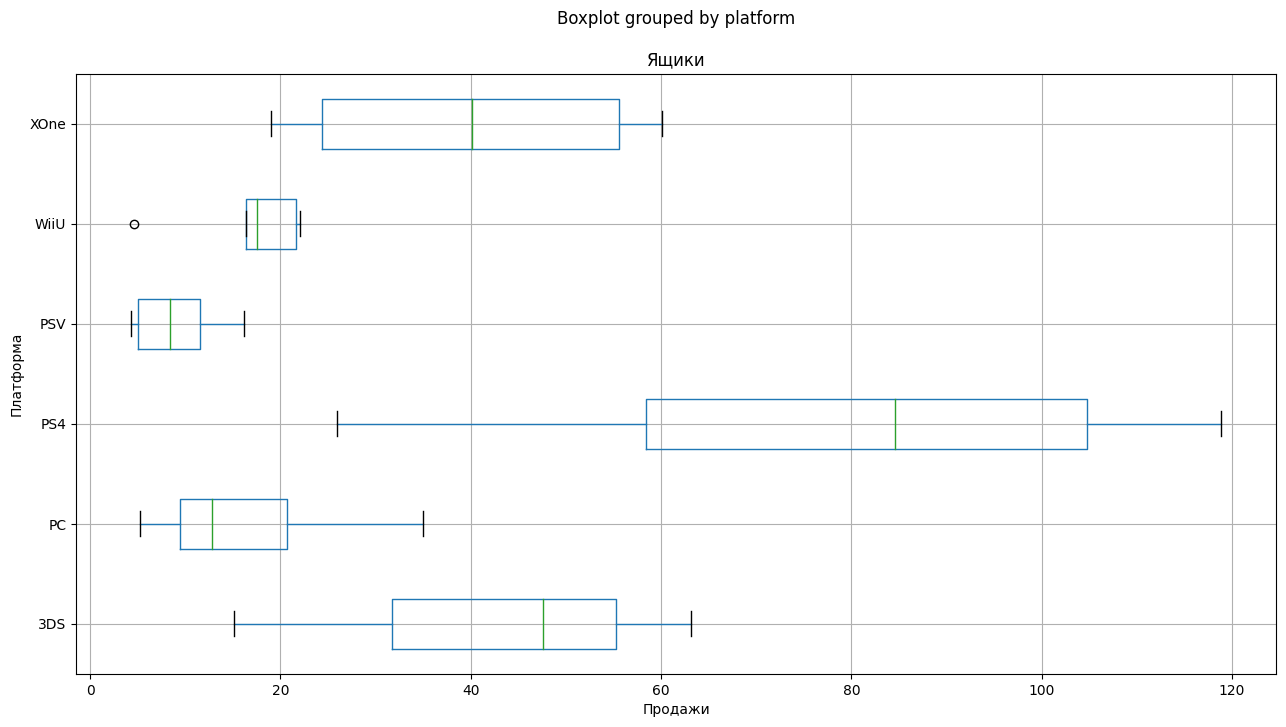

In [39]:
fig4 = data_actual_sales_years.boxplot(by='platform', column = 'ttl_sales', figsize =(15, 8), vert = False)
fig4.set_ylabel('Платформа')
fig4.set_xlabel('Продажи')
fig4.set_title('Ящики');

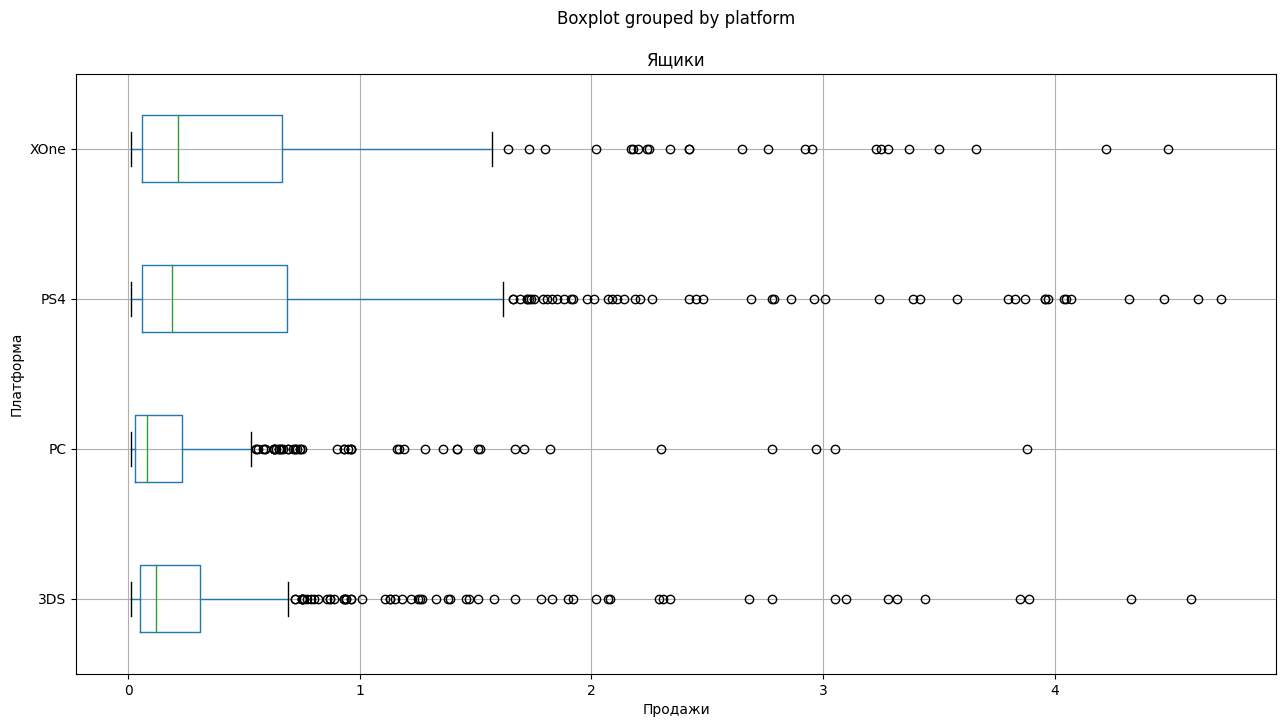

In [40]:
perspective = ['3DS', 'PC', 'XOne', 'PS4']
fig5 = data_actual.query('platform in @perspective and ttl_sales < 5').boxplot(by = 'platform', column = 'ttl_sales'
                                                                               , figsize =(15, 8), vert = False)
fig5.set_ylabel('Платформа')
fig5.set_xlabel('Продажи')
fig5.set_title('Ящики');

**Вывод**
1. Для прогноза на 2017 актуальны 4 платформы, в т.ч. **XOne** и **PC**.
2. Наиболее прибыльные из этих платформ — **PS4**, **3DS** и **XOne**.
3. Однако доходность всех платформ после 2015 года снижается.
4. Самые нестабльные продажи на **PS4** (большой разброс значений на диаграмме размаха).
5. Самые стабильные — на **WiiU** и **PSV**, они же самые низкие.

### Влияние отзывов на продажи
* корреляция между отзывами и продажами
* диаграмма рассеяния

In [41]:
data_actual_platform_max = data_actual[(data_actual['platform']==data_actual_sales['platform'][0])&
                                      (data_actual['critic_score']>=0)&
                                      (data_actual['user_score']>=0)]

In [42]:
for column in ['critic_score', 'user_score']:
    print (column)
    print('ttl_sales: ', round(data_actual_platform_max['ttl_sales'].corr(data_actual_platform_max[column]),2))    
    print('____________________________________________')

critic_score
ttl_sales:  0.41
____________________________________________
user_score
ttl_sales:  -0.03
____________________________________________


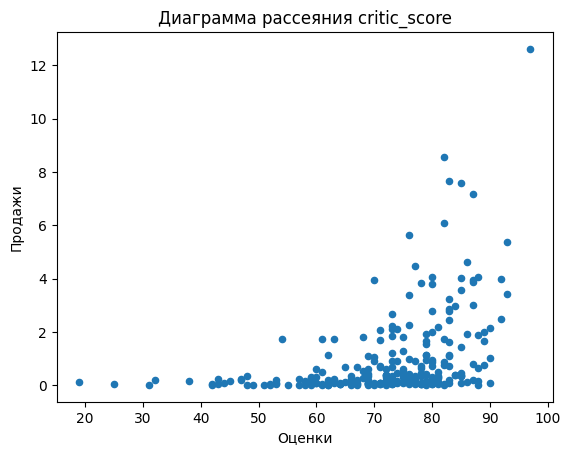

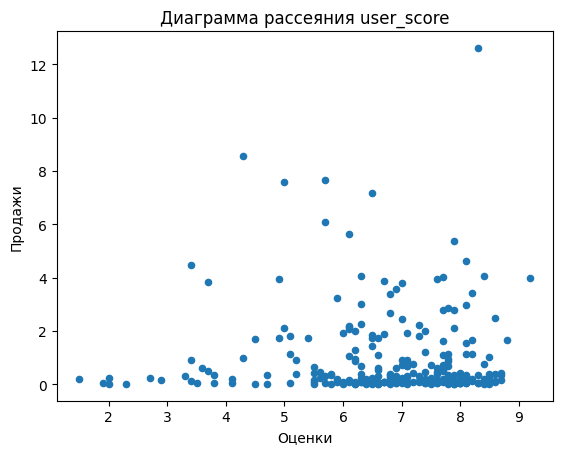

In [43]:
for column in ('critic_score','user_score'):
    fig5 = data_actual_platform_max.plot(x=column, y='ttl_sales', kind='scatter') 
    fig5.set_ylabel('Продажи')
    fig5.set_xlabel('Оценки')
    fig5.set_title('Диаграмма рассеяния {}'.format(column))

In [44]:
for column in ['critic_score', 'user_score']:
    print (column)
    print('ttl_sales: ', round(data_actual[(data_actual['critic_score']>=0)
                            &(data_actual['user_score']>=0)]['ttl_sales'].corr(data_actual[(data_actual['critic_score']>=0)
                                                                           &(data_actual['user_score']>=0)][column]),2))    
    print('____________________________________________')

critic_score
ttl_sales:  0.31
____________________________________________
user_score
ttl_sales:  0.04
____________________________________________


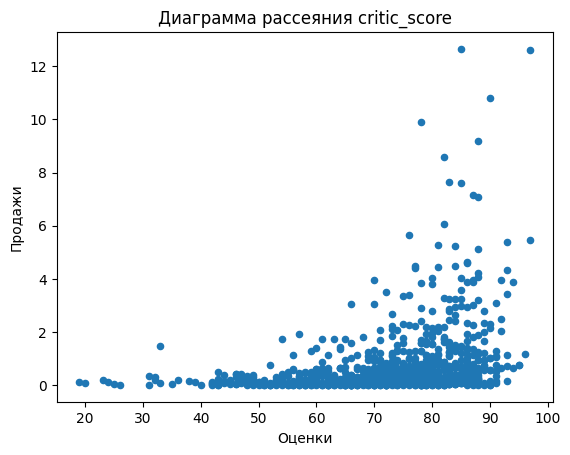

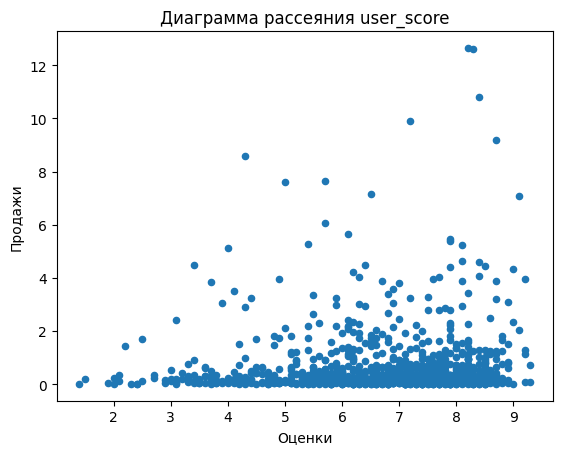

In [45]:
for column in ('critic_score','user_score'):
    fig6 = data_actual[(data_actual['critic_score']>=0)&(data_actual['user_score']>=0)].plot(x=column
                                                                                             , y='ttl_sales'
                                                                                             , kind='scatter') 
    fig6.set_ylabel('Продажи')
    fig6.set_xlabel('Оценки')
    fig6.set_title('Диаграмма рассеяния {}'.format(column))

**Вывод**
1. Продажи игр на самой прибыльной платформе **PS4**:
   * зависят от оценок критиков — прямопропорционально: чем выше оценки, тем больше продажи
   * не зависят от оценок пользователей 
2. Те же закономерности наблюдаются в индустрии в целом, т.е. если смотреть по всем актуальным платформам сразу.

### Игры по жанрам

In [46]:
data_actual_genres = data_actual.groupby('genre').agg({'ttl_sales':'sum', 'name':'count'}).reset_index()
data_actual_genres = data_actual_genres.rename(columns={'name':'games_cnt'})
data_actual_genres['sales_per_game'] = (data_actual_genres['ttl_sales']/data_actual_genres['games_cnt']).round(2)
data_actual_genres.sort_values(by='ttl_sales', ascending = False).reset_index(drop=True)

,genre,ttl_sales,games_cnt,sales_per_game
0,Action,246.88,717,0.34
1,Shooter,182.92,162,1.13
2,Role-Playing,161.46,284,0.57
3,Sports,101.46,164,0.62
4,Platform,65.56,77,0.85
5,Racing,49.34,92,0.54
6,Misc,44.27,146,0.30
7,Simulation,41.26,87,0.47
8,Fighting,30.67,63,0.49
9,Adventure,19.64,204,0.10


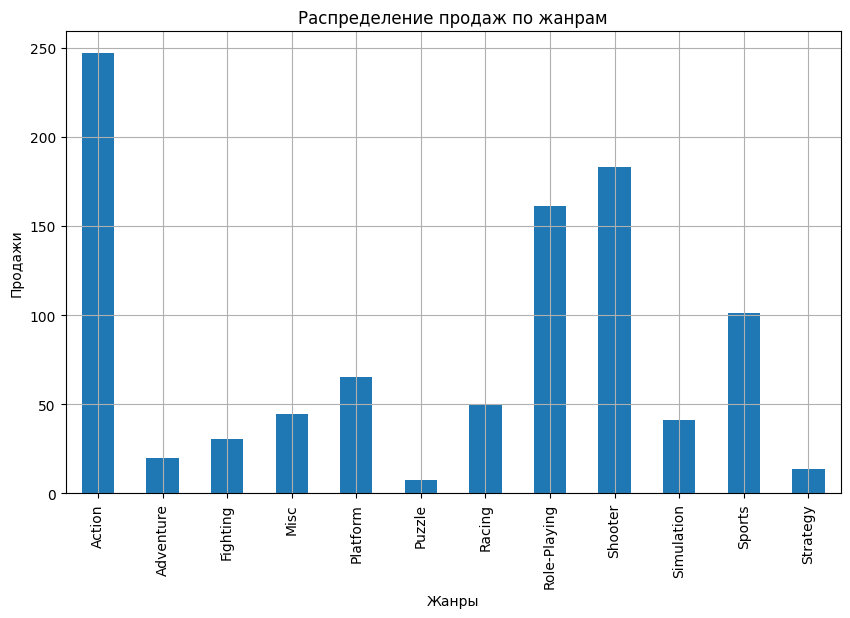

In [47]:
fig6 = data_actual_genres.plot(kind='bar', x='genre', y='ttl_sales', figsize =(10, 6), legend = False, grid = True)
fig6.set_ylabel('Продажи')
fig6.set_xlabel('Жанры')
fig6.set_title('Распределение продаж по жанрам');

**Вывод**
1. Наиболее прибыльный игровой жанр — **Action**. В этом жанре выпускают больше всего игр.
2. На втором месте — шутеры, эти игры самые дорогие.
3. Меньше всего покупают игры в жанре **Puzzle**, причём отставание от ближайшего конкурента значительное: более, чем в 3 раза.
3. Жанр **Sports** на четвёртом месте по доходности и уступает лидеру более, чем в 2 раза.

### Пользователи по регионам
Для каждого региона:
* Топ-5 платформ
* Топ-5 жанров
* Влияет ли рейтинг **ESRB** на продажи

In [48]:
data_actual_region_platform_all = pd.DataFrame()
for region in ('na_sales','eu_sales','jp_sales','other_sales'):
    data_actual_region_platform = pd.DataFrame(data_actual.groupby('platform')[region].sum()).reset_index()
    data_actual_region_platform = data_actual_region_platform.sort_values(by=region, ascending = False).reset_index(drop=True)
    data_actual_region_platform[region] = round(data_actual_region_platform[region]/data_actual[region].sum()*100,2)
    data_actual_region_platform_all = pd.concat([data_actual_region_platform_all, data_actual_region_platform]
                                                , axis=1).head()
data_actual_region_platform_all = data_actual_region_platform_all.T.drop_duplicates().T

In [49]:
data_actual_region_platform_all

,platform,na_sales,platform,eu_sales,platform,jp_sales,platform,other_sales
0,PS4,29.8,PS4,40.44,3DS,66.3,PS4,48.66
1,XOne,25.52,3DS,17.56,PSV,14.39,XOne,14.36
2,3DS,22.65,PC,16.25,PS4,10.52,3DS,13.35
3,WiiU,10.44,XOne,14.79,WiiU,8.57,PC,11.17
4,PC,8.19,WiiU,7.2,XOne,0.22,PSV,6.47


In [50]:
data_actual_region_genre_all = pd.DataFrame()
for region in ('na_sales','eu_sales','jp_sales','other_sales'):
    data_actual_region_genre = pd.DataFrame(data_actual.groupby('genre')[region].sum()).reset_index()
    data_actual_region_genre = data_actual_region_genre.sort_values(by=region, ascending = False).reset_index(drop=True)
    data_actual_region_genre[region] = round(data_actual_region_genre[region]/data_actual[region].sum()*100,2)
    data_actual_region_genre_all = pd.concat([data_actual_region_genre_all, data_actual_region_genre]
                                             , axis=1).head()
data_actual_region_genre_all = data_actual_region_genre_all.T.drop_duplicates().T

In [51]:
data_actual_region_genre_all

,genre,na_sales,genre,eu_sales,genre,jp_sales,other_sales
0,Action,25.59,Action,25.86,Role-Playing,35.71,26.89
1,Shooter,22.42,Shooter,20.9,Action,24.08,23.38
2,Role-Playing,14.25,Sports,12.52,Platform,7.06,13.3
3,Sports,10.97,Role-Playing,12.3,Misc,7.05,12.44
4,Platform,7.39,Platform,6.39,Simulation,7.01,5.62


In [52]:
data_actual_region_rating_all = pd.DataFrame()
for region in ('na_sales','eu_sales','jp_sales','other_sales'):
    data_actual_region_rating = pd.DataFrame(data_actual.groupby(['rating'])[region].sum()).reset_index()
    data_actual_region_rating = data_actual_region_rating.sort_values(by=region, ascending = False).reset_index(drop=True)
    data_actual_region_rating[region] = round(data_actual_region_rating[region]/data_actual[region].sum()*100,2)
    data_actual_region_rating_all = pd.concat([data_actual_region_rating_all, data_actual_region_rating]
                                              , axis=1)
data_actual_region_rating_all = data_actual_region_rating_all.T.drop_duplicates().T

In [53]:
data_actual_region_rating_all

,rating,na_sales,eu_sales,rating,jp_sales,rating,other_sales
0,M,30.75,32.44,undefined,57.92,M,34.34
1,E,22.23,23.41,E,19.61,undefined,21.05
2,undefined,21.61,21.69,T,10.87,E,20.65
3,T,13.11,12.79,M,6.11,T,14.07
4,E10+,12.3,9.67,E10+,5.48,E10+,9.88
5,RP,0.0,0.01,RP,0.0,RP,0.01


**Вывод**
1. Платформы
   * самой популярной платформой в мире является **PS4** — не на первом месте по продажам только в Японии
   * японцы же предпочитают **3DS** и **PSV**.
2. Жанры
   * топ-5 жанров в Северной Америке и Европе почти совпадают. Популярнее всего экшен-игры и шутеры, в Европе тройку замыкает спорт, а в Северной Америке — РПГ.
   * в странах остального мира и Японии на первом месте ролевые игры и, в отличие от Америки и Европы, не популярны спортивные.
3. Рейтинг
   * топ-5 ESRB по продажам совпадает в Северной Америке и Европе, на первом месте игры рейтинга **M**
   * Япония предпочитает игры рейтинга **E**
   * большая часть продаж во всём мире приходится на игры рейтингов **M**, **E** и **T**.

## Статистический анализ
* Предположение 1 — Средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые
* Предположение 2 — Средние пользовательские рейтинги жанров **Action** и **Sports** разные

In [54]:
alpha = 0.05

### Предположение 1
* H0 — Средние пользовательские рейтинги платформ **Xbox One** и **PC** равны
* H1 — Средние пользовательские рейтинги платформ **Xbox One** и **PC** отличаются

In [55]:
XOne = data_actual[(data_actual['platform']=='XOne')&(data_actual['user_score']>=0)]['user_score']
PC = data_actual[(data_actual['platform']=='PC')&(data_actual['user_score']>=0)]['user_score']

In [56]:
results_1 = st.ttest_ind(XOne, PC)

In [57]:
print('p-значение:', results_1.pvalue)

p-значение: 0.6267602271422398


In [58]:
if results_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


### Предположение 2
* H0 — Средние пользовательские рейтинги жанров **Action** и **Sports** равны
* H1 — Средние пользовательские рейтинги жанров **Action** и **Sports** отличаются

In [59]:
action = data_actual[(data_actual['genre']=='Action')&(data_actual['user_score']>=0)]['user_score']
sports = data_actual[(data_actual['genre']=='Sports')&(data_actual['user_score']>=0)]['user_score']

In [60]:
results_2 = st.ttest_ind(action, sports)

In [61]:
print('p-значение:', results_2.pvalue)

p-значение: 3.7279566072817166e-13


In [62]:
if results_2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


In [63]:
action.mean().round(2)

6.83

In [64]:
sports.mean().round(2)

5.72

* H0 — Средние пользовательские рейтинги жанров **Action** и **Sports** равны
* H1 — Средние пользовательские рейтинги жанра **Action** больше, чем у жанра **Sports** 

In [65]:
results_3 = st.ttest_1samp(action, sports.mean())

In [66]:
print('p-значение: ', results_3.pvalue / 2)

p-значение:  1.044574583730869e-44


In [67]:
if (results_3.pvalue / 2 < alpha) and (action.mean() > sports.mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Отвергаем нулевую гипотезу


**Вывод**
1. Предположение 1 подтвердилось:
   * средние пользовательские рейтинги платформ **Xbox One** и **PC** не различаются.
2. Предположение 2 подтвердилось:
   * пользователи по-разному оценивают игры жанра экшен и спортивные игры
   * жанр **Action** пользователи оценивают выше.

## Общий вывод

1. Самые популярные в мире игры — экшен и шутеры.
2. А играют чаще всего на **PS4**.
3. В Европе и Америке любимые жанры у людей в основном совпадают. 
4. Японцы же предпочитают РПГ и **3DS**.
6. Самые ходовые игры во всём мире имеют возрастной рейтинг **M**, **E** или **T**.
7. Покупатели больше ориентируются на отзывы критиков, чем отзывы других покупателей.
8. Пользовательский рейтинг **Xbox One** такой же, как у **PC**, но в целом платформа **Xbox One** более доходна.
9. После 2015 продажи игр на всех платформах падают.
10. Платформа в среднем живёт около 10 лет, а ПК бессмертен.